# Assignment 3.1 - Money Market Rates

## DRW & UofC Quant Foundations
### Summer 2025
#### Mark Hendricks
#### hendricks@uchicago.edu

***

# Data

Use the data in `data/ref_rates.xlsx` to explore several key money-market rates.
* SOFR
* Fed funds
* 3-month T-bill yield

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_excel('../data/ref_rates.xlsx', sheet_name='data')
data.head()

,date,DTB3,DFF,SOFR
0,2018-01-01,NaN,1.33,NaN
1,2018-01-02,1.42,1.42,NaN
2,2018-01-03,1.39,1.42,NaN
3,2018-01-04,1.39,1.42,NaN
4,2018-01-05,1.37,1.42,NaN


***

# 1. Exploring Money-Market Rates

### 1.
Plot the time series.



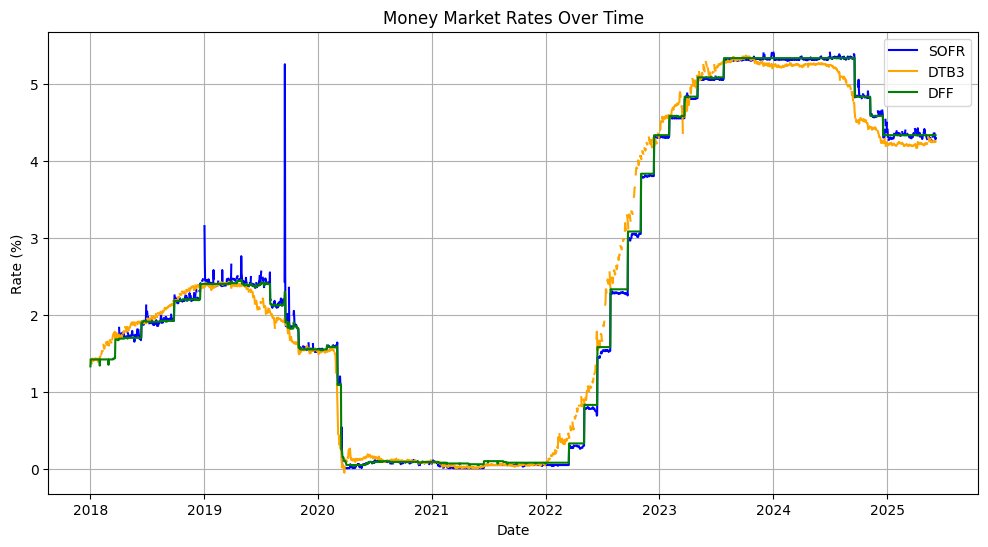

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['SOFR'], label='SOFR', color='blue')
plt.plot(data['date'], data['DTB3'], label='DTB3', color='orange')
plt.plot(data['date'], data['DFF'], label='DFF', color='green')
plt.title('Money Market Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid()
plt.show()

---
### 2.
Calculate the correlation between the three rates (filtering to the dates for which they all have reported values.)

Do this correlation analysis for the data in
* levels (as provided)
* differences (day-over-day changes)



In [19]:
data_diff = data[['SOFR', 'DTB3', 'DFF']].pct_change().dropna()

data_clean = data.dropna()
correlation_levels = data_clean[['SOFR', 'DTB3', 'DFF']].corr()
correlation_diff = data_diff.corr()
print("Correlation of levels:")
print(correlation_levels)
print("\nCorrelation of differences:")
print(correlation_diff)



Correlation of levels:
          SOFR      DTB3       DFF
SOFR  1.000000  0.993079  0.999114
DTB3  0.993079  1.000000  0.994724
DFF   0.999114  0.994724  1.000000

Correlation of differences:
          SOFR      DTB3       DFF
SOFR  1.000000 -0.000546  0.655097
DTB3 -0.000546  1.000000  0.031736
DFF   0.655097  0.031736  1.000000


C:\Users\daksh\AppData\Local\Temp\ipykernel_31576\3237935043.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_diff = data[['SOFR', 'DTB3', 'DFF']].pct_change().dropna()


---
### 3.

Estimate an autoregression for SOFR:

$$r_{t} = \alpha + \beta\, r_{t-1} + \epsilon_{t}$$

Report the estimated regression beta and r-squared.

Comment on what this regression tells us about the nature of interest rates. 
* That is, can we forecast the next period's rate? 
* Does the series have **autocorrelation**?



In [44]:
sofr = data['SOFR'].dropna()
y = sofr[1:]
X = sofr.shift(1).dropna()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   SOFR   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.700e+05
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:16:40   Log-Likelihood:                 1369.5
No. Observations:                1793   AIC:                            -2735.
Df Residuals:                    1791   BIC:                            -2724.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.004      1.127      0.2

Beta = 0.9986

r^2 = 0.997

There is high autocorrelation and we can predict the next periods rate with good accuracy. This is because interest rates move slowly over time.

---
### 4.

Estimate an autoregression for returns of the S&P 500 ETF, `SPY`, rather than using SOFR. Get data from 
* `data/spy_data.xlsx`

Are SPY returns autocorrelated? And SPY prices?

In [50]:
returns = pd.read_excel('../data/spy_data.xlsx', sheet_name='total returns')
prices = pd.read_excel('../data/spy_data.xlsx', sheet_name='prices')
returns.head()

,date,SPY,^IRX
0,1994-01-04,0.004035,0.000122
1,1994-01-05,0.002009,0.000122
2,1994-01-06,0.000000,0.000121
3,1994-01-07,0.006016,0.000119
4,1994-01-10,0.011960,0.000119


In [51]:
prices.head()

,date,SPY,^IRX
0,1994-01-03,26.761881,3.03
1,1994-01-04,26.869873,3.08
2,1994-01-05,26.923864,3.07
3,1994-01-06,26.923864,3.05
4,1994-01-07,27.085838,3.01


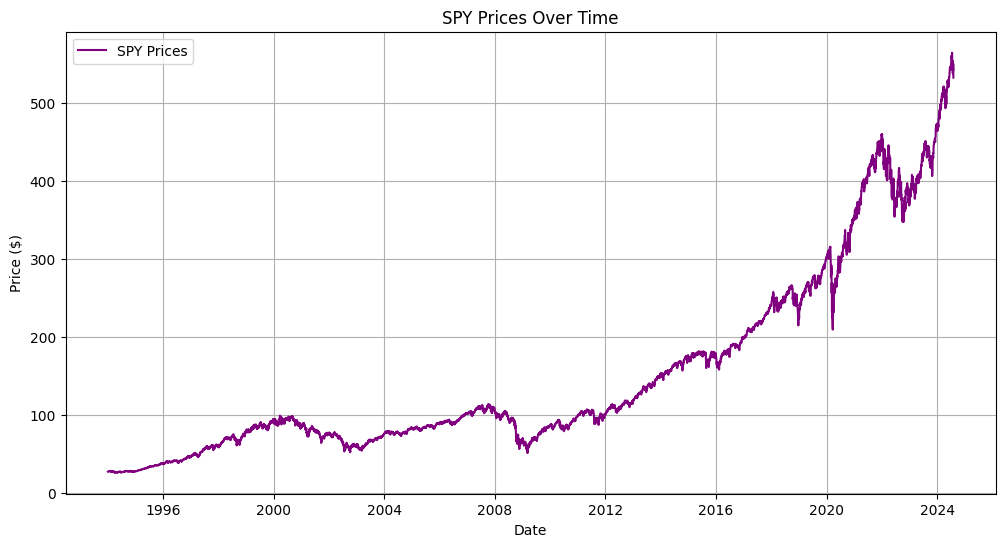

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(prices['date'], prices['SPY'], label='SPY Prices', color='purple')
plt.title('SPY Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

In [52]:
spy_returns = returns['SPY'].dropna()
y = spy_returns[1:]
X = spy_returns.shift(1).dropna()
X = sm.add_constant(X)
model_spy = sm.OLS(y, X).fit()
print(model_spy.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     52.04
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           5.95e-13
Time:                        16:21:35   Log-Likelihood:                 23152.
No. Observations:                7679   AIC:                        -4.630e+04
Df Residuals:                    7677   BIC:                        -4.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      3.674      0.0

returns have very low auto correlation and low predictive power (DB test = 2.005, r^2 = 0.007)

In [53]:
spy_prices = prices['SPY'].dropna()
y = spy_prices[1:]
X = spy_prices.shift(1).dropna()
X = sm.add_constant(X)
model_spy_prices = sm.OLS(y, X).fit()
print(model_spy_prices.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.586e+07
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:22:36   Log-Likelihood:                -16587.
No. Observations:                7680   AIC:                         3.318e+04
Df Residuals:                    7678   BIC:                         3.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.038      0.053      0.9

***